# Blackjack with Card Counting
#### By Ryan Porter

## Abstract
The goal of this project was to determine what strategies in Blackjack produce the biggest profits. Casino games always have the probability on their side, but are we able to develop a strategy that takes it away? The rules of Blackjack are pretty simple since each of the players is attempting to get as close to 21 without going over. Card counting is a process where it attempts to give the player the edge over the casino by keeping track of the cards being played. Each card is assigned a value depending on the strategy and by adding all card values should result in sum 0. Unfortunately to be expected many of the strategies did not offer any real advantage over many iterations. I tired nine different card counting strategies, one in which I just doubled the numbers of the basic strategy. In the end, there is really only one strategy that provides a clear small advantage which is the Hi-Lo method. They were other card counting strategies that actually performed worse than the basic strategy. Before you head to the Casino, realize that even with the best strategy there wasn’t a large edge over the Casino. 

## Background
Blackjack as known as Twenty-One, is a card game between one or more players and a dealer. Each player takes turns competing against the dealer, the goal is to have your cards sum be as close to 21 as possible. 
- Each player is dealt two cards; one the dealer's card is face down.
- "Hit" is to ask for another card and "Stand" with your original two. 
- If the player is dealt an Ace and a ten-valued card, that's a blackjack and the player win.
- If the player's sum exceeds 21, then that's a "bust" and he loses.
- If the dealer busts and the player does not, then the player wins.
- The dealer will hit until they have a sum greater than 16.
- If the player has a higher sum than the dealer without busting, then the player wins.
- If the player and dealer have the same sum or both got Blackjack, then it's a draw.

There are many different variations to the game with lots of other rules depending on the casino, but I wanted to keep it simple. Also, in terms of simplicity I only used one player and one dealer. Since one player doesn't affect the game for another player, I only had one player. For the sake of simplicity, I am not going leave out splitting, doubling down, and surrendering. That means the player has two options: hit or stay. In order to try tilting the odds in our favor, we are going to try a few different card counting strategies. At the end the results from the different strategies will be discussed to determine which is the most effective. I will walk through most of the code detailing what it is doing and then run the code to show the results.

## Import Modules

In [4]:
import random
import pandas as pd
import pickle
import matplotlib.pyplot as plt

There are a few different modules that I will need for the code. The first one is the random module; this is used for shuffling the decks of cards. To make sure that we aren't repeating the same sequence in drawing cards, they should be shuffled after creating the cards so no two should be alike. The panda modules are used for importing and exporting the different card counting strategies. The pickle module builds off the pandas module in that it takes the pd and converts it to pickle format to store the strategies in one file. I used pickle instead of csv or something similar because it would keep a standard format without have to re-convert it when reading in the strategies. I mostly program in R so I am very familiar with ggplot and wanted to use it for the results section. Ggplot offers a lot of customizations and tweaking that plotting in basic python doesn't give you. That's all the modules that will be needed for this simulation as much of the code is if statements and checks.

## Create Basic Functions

In [5]:
# Create a standard deck of cards, default is two decks
def create_deck(number_decks=2): 
    # a deck of cards has 4 of every card value
    deck = ['2','3','4','5','6','7','8','9','10','J','Q','K','A']*4*number_decks
    random.shuffle(deck) #shuffle deck to randomize
    return deck

# Deals a card, default is one incase you want to hit
def deal_card(hand, deck, number_of_cards=1): 
    for _ in range(number_of_cards):
        hand.append(deck.pop()) #take a card off the deck and move it into the hand
    return hand

# Check is ace makes player bust
# two different values for Ace one and eleven
def check_if_ace(hand): 
    if 'A' in hand:
        hand[hand.index('A')] = 'A.' 
        return True
    else:
        return False

# Calculates sum  in hand 
def hand_total(hand): 
    val = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, 
             '9': 9, '10': 10, 'J': 10, 'Q': 10, 'K': 10, 'A': 11, 'A.': 1}
    return int(sum(val[i] for i in hand))

The most important definition is the first one, create deck. In order to simulate Blackjack, you first have to make a deck of cards. In a deck of cards there are cards 2-10 with the same face value, Jack, Queen, King with a value of 10 and Ace with either 1 or 11 as its value. A deck of cards includes all 4 suits which totals to 52 playing cards in a deck. When reading about Casino's they usually play with 1 to 8 decks of cards, so I opted for 2 decks as a default. After the decks are created then we shuffle them, so we don't just repeat the same game over and over. The next function deals a card to the person and takes the card out of the deck. Checks the ace function makes sure an ace is not causing the player or dealer to bust and reassigns if needed. The last function is important because all of these strategies relies on knowing the sum of your hand which it calculates.

## Player Turn Function

In [6]:
# Choose hit or stay
def player_turn(your_hand, limit, true_count, dealer_hand):   
    
    dealer_total = hand_total(dealer_hand[:1]) #dealers displayed card value

    # true count = running count / decks remainging
    # true count bigger than one means there are face cards left
    if true_count > 0:
        if hand_total(your_hand) >= limit:
            return 'stay'
        elif hand_total(your_hand) < limit:
            return 'hit'
        elif dealer_total >= 10:
            return 'stay'
               
    # Meaning there are plenty of low cards left: < 6 value
    elif true_count < 0:
        if hand_total(your_hand) <= limit:
            return 'hit'
        elif hand_total(your_hand) > limit:
            return 'stay'
        elif dealer_total < 10:
            return 'hit'
                
    # count is neutral so use basic strategy
    # This is a modified version of basic strat
    else:
        if hand_total(your_hand) >= 17:
            return 'stay'
        elif 11 < hand_total(your_hand) < 17 and dealer_total <7:
            return 'stay'
        elif 11 < hand_total(your_hand) < 17 and dealer_total > 6:
            return 'hit'
        elif hand_total(your_hand) < 12:
            return 'hit'

The whole point of this simulation is when to hit and when to stay based on your card values. The else statement is based on the graph below. It is supposed to help you play the perfect game of Blackjack. We only run this strategy if our true count is neutral otherwise there are better strategies. If the true count is too high or low then there are better strategies to use than the bsic strategy.

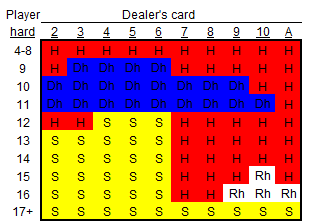

I got this graph from the Wizard of Odds to use as my basic Blackjack strategy. I didn't follow this chart exactly because they allow for a Double Hit or Surrender, which I did not program for. Instead I did it more as a general guideline since it is better than no strategy at all. There were many websites that talked about the perfect strategy which this chart is part of that. However, that strategy still only gives the player about 0.5% edge over the dealer. Even with all of these strategies you won't be winning a ton like 60% of the time. Keep your expectations in check because after all this is the casino we are playing against.

## Dealer Functions

In [7]:
# Dealers turn
def dealer_turn(your_hand, dealer_hand, total, dealer_total, deck, running_count, true_count, strategy, turn=True): 
    # running count of wins and losses
    wins = 0
    draw = 0
    loss = 0
    
    while turn: # Looping while its their move
        total  = hand_total(your_hand)
        
        if total > 21:    
            # Check to see if there is an Ace making them bust
            check_if_ace(your_hand)
            total = hand_total(your_hand)
            continue
            
        dealer_total = hand_total(dealer_hand)

        # Dealing the dealer cards if <= 16, stated in the background
        while dealer_total <= 16: 
            deal_card(dealer_hand, deck)
            dealer_total = hand_total(dealer_hand)
            
            # True counter and running count
            running_count += card_counter(dealer_hand[-1:], strategy)
            true_count = true_counter(deck, running_count)
            
        # Checking to see if dealer wins
        if dealer_total == 21: 
            loss += 1
            break

        # Dealer bust?
        elif dealer_total > 21: 
            if check_if_ace(dealer_hand):
                continue
            else:
                wins += 1
                break
                
        # Compare dealer hand to player hand, determine who wins
        elif 17 <= dealer_total <= 21: 
            if dealer_total > total:
                loss += 1
                break
            elif dealer_total < total:
                wins += 1
                break
            elif dealer_total == total:
                draw += 1
                break
            else:
                wins += 1
                break
    return [wins, loss, draw, running_count, true_count]

This function is having the dealer make his move then comparing to the player to see who wins. The first thing you do is set all wins and losses counters to zero. Then we check to see if the dealer's card sum is greater than 21 and if so, is there an Ace in his hand. If there is an Ace, then we convert that to 1 instead of 11 and continue the program. I mentioned in the background that the dealer would hit if their card sum is less than 17 which happens after the Ace check. The counter section holds two different counts: the running count and the true count. The true count is the number of cards left in all the decks. For example, we have a running count of 5 with only 1 deck left, that means there are 5 extra 10's and Aces in the remaining 52 cards. True count is very important to keep track of as it lets us know what cards are left in order to compute edge advantage.

## Card Counting Strategies

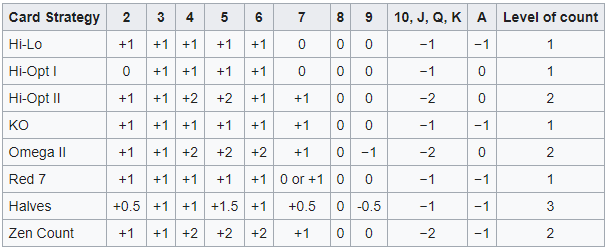

The most common strategy is called Hi-Lo, the reason is that at the right end the value is +1 and on the left side it is -1. The idea is when the deck has one card left, the value of the remaining card plus the running sum of the deck will equal 0. It gets its name from being high value (+1) on one end and low values (-1) on the other end. I got this table from the Wikipedia page on Blackjack which included all the count values for the different strategies. I am not going to go through each of the different strategies because the values assigned for each card gets complicated. I'll leave it to the reader to find out why those values are assigned for each of the strategies. The level of count corresponds to the number of different point values the system uses.

In [8]:
# A dictionary with Hi-Lo values
vals = {'2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 0, '8': 0, '9': 0, '10': -1, 'J': -1, 
        'Q': -1, 'K': -1, 'A': -1, 'A.': -1}

# DataFrame of vals at index 0
df = pd.DataFrame(vals, index=[0])

# Adding in values to each row in the DF
df.loc[len(df), :] = [0,1,1,1,1,0,0,0,-1,-1,-1,-1,0,0] #Add a new entry in the dataframe for the Hi-Opt 1 strategy
df.loc[len(df), :] = [1,1,2,2,1,1,0,0,-2,-2,-2,-2,0,0]
df.loc[len(df), :] = [1,1,1,1,1,1,0,0,-1,-1,-1,-1,-1,-1]
df.loc[len(df), :] = [1,1,2,2,2,1,0,-1,-2,-2,-2,-2,0,0]
df.loc[len(df), :] = [1,1,1,1,1,0,0,0,-1,-1,-1,-1,-1,-1]
df.loc[len(df), :] = [.5,1,1,1.5,1,.5,0,-.5,-1,-1,-1,-1,-1,-1]
df.loc[len(df), :] = [1,1,2,2,2,1,0,0,-2,-2,-2,-2,-1,-1]
df.loc[len(df), :] = [2,2,2,2,2,0,0,0,-2,-2,-2,-2,-2,-2]
df.loc[len(df), :] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]

# Renaming the index for each row
df.rename({0: 'Hi-Lo (Most Common)',
           1: 'Hi-Opt I',
           2: 'Hi-Opt II',
           3: 'KO',
           4: 'Omega II',
           5: 'Red 7',
           6: 'Halves',
           7: 'Zen Count',
           8: 'Double It',
           9: 'No Strategy'}, inplace=True)

print(df)
df.to_pickle('Card_Counting_Strat_Values')

                       2    3    4    5    6    7    8    9   10    J    Q  \
Hi-Lo (Most Common)  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0 -1.0 -1.0 -1.0   
Hi-Opt I             0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0 -1.0 -1.0 -1.0   
Hi-Opt II            1.0  1.0  2.0  2.0  1.0  1.0  0.0  0.0 -2.0 -2.0 -2.0   
KO                   1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0 -1.0 -1.0 -1.0   
Omega II             1.0  1.0  2.0  2.0  2.0  1.0  0.0 -1.0 -2.0 -2.0 -2.0   
Red 7                1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0 -1.0 -1.0 -1.0   
Halves               0.5  1.0  1.0  1.5  1.0  0.5  0.0 -0.5 -1.0 -1.0 -1.0   
Zen Count            1.0  1.0  2.0  2.0  2.0  1.0  0.0  0.0 -2.0 -2.0 -2.0   
Double It            2.0  2.0  2.0  2.0  2.0  0.0  0.0  0.0 -2.0 -2.0 -2.0   
No Strategy          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                       K    A   A.  
Hi-Lo (Most Common) -1.0 -1.0 -1.0  
Hi-Opt I            -1.0  0.0  0.0  
Hi-Opt II           -2.0  0.0 

I first created a dictionary that has the Hi-Lo Strategy values indexed at 0. Then I convert the dictionary to a data frame so that it is easier to add all the other strategies. The values being inputted to the data frame are the same values as the graph shown previously. Since it's contained in the data frame then renaming it is super easy by replacing their numeric index with the strategy names. I ended up converting the data frame to pickle format because I couldn't get it to read the data frame correctly or converting to CSV. I actually got this trick of using the pickle format from "Python Blackjack Simulator" who used it to convert a similar data frame.

## Read in the Strategies

In [9]:
df = pd.read_pickle('Card_Counting_Strat_Values')

# Count cards using whatever strategy, default is Hi-Lo
# It returns the sum of hand
def card_counter(hand, strategy='Hi-Lo'):
    return sum(list(map(lambda i: df.loc[strategy][i].item(), hand)))

# Calculates the true count
def true_counter(deck, running_count):
    try:
        return round(running_count/(len(deck)//52))
    except:
        # Compensating for when there 1 deck or less than 52 cards
        return running_count

We read in the pickle file that contains all the different card counting values. The card counter sums up the hand using the strategy that is specified. This is different than hand total because that does not use a strategy to sum but uses the cards face value. I have previously talked about the true count the but that was when the player was using it to decide whether to hit or stay. The true counter keeps track of the count throughout the simulation and not just for the player's turn.

## The Game

In [10]:
#play blackjack
def blackjack(deck, limit, running_count, true_count, strategy):
    your_hand   = deal_card([], deck, 2)
    dealer_hand = deal_card([], deck, 2)
    
    # Track wins, losses, and draws
    wins, draw, loss = 0,0,0
    
    # Card Counting
    running_count  += card_counter(your_hand, strategy) + card_counter(dealer_hand[:1], strategy)
    true_count  = true_counter(deck, running_count)
    
    # Looping through the moves until deck is empty
    while len(deck) > 1:
        
        # Check if the player has blackjack
        if hand_total(your_hand) == 21 and hand_total(dealer_hand) < 21:
            
            # Card Counting
            running_count  += card_counter(dealer_hand[-1:], strategy)
            true_count  = true_counter(deck, running_count)
            
            wins += 1
            break
        
        # Checking if the player and the dealer both have blackjacks
        elif hand_total(your_hand) == 21 and hand_total(dealer_hand) == 21:
            
            # Counter
            running_count += card_counter(dealer_hand[-1:], strategy)
            true_count = true_counter(deck, running_count)
            
            draw += 1
            break
        
        # Allowing the player to move
        move = player_turn(your_hand, limit, true_count, dealer_hand)
        
        if move == "hit": 
            deal_card(your_hand, deck)
            total = hand_total(your_hand)
            
            # Counter
            running_count += card_counter(your_hand[-1:], strategy)
            true_count = true_counter(deck, running_count)
            
            # Checking if the player busts
            if  total > 21:              
                # Ace in player hand?
                if check_if_ace(your_hand): 
                    total = hand_total(your_hand)
                    continue
                # Otherwise they bust
                else:                    
                    loss += 1
                    break
            elif total < 21:             
                # Ask the player for a move
                continue
            # Check if player has gotten blackjack
            elif total == 21:            
                wins += 1
                break
                
        elif move == "stay":
            total  = hand_total(your_hand)
            dealer_total = hand_total(dealer_hand)
            
            # Counter
            running_count += card_counter(dealer_hand[-1:], strategy)
            true_count = true_counter(deck, running_count)
            
            # The dealer's turn
            result = dealer_turn(your_hand, dealer_hand, total, dealer_total, deck, running_count, true_count, strategy)
            
            # The results of the dealer's turn
            wins += result[0]
            loss += result[1]
            draw += result[2]
            
            # Counter 
            running_count  = result[3]
            true_count = result[4]
            break
            
    # Results of the game
    return [wins, loss, draw, running_count, true_count]

I am not going to go through all of this as a lot of this is just if and check statements. This section contains the how to actually play through a Blackjack game. Both the player and the dealer are given two cards to start with from the deck. Then there are two different card counters, the running count, and the true count. There is a while statement that keeps playing the game as long as there are cards in the deck. First thing we check is if the dealer or the player has a natural Blackjack because if so then the hand is already won. Then the player is able to make his move which is two different statements depending on if they wanted to stay or hit. Again, if the player hits it updates the deck and counts then checks if either of them have won. Depending on if the player or dealer wins it updates the associated variable and wins/losses. 

## Play Game

In [11]:
# Loop the game until no playing cards
def play_blackjack(limit, strategy):
   
    deck = create_deck(6) # create a deck with 6 decks of cards within it
    wins,draw,loss = [], [], []
    rounds_played,running_count,true_count = 0,0,0
            
    while True:
        
        # Running blackjack
        game = blackjack(deck, limit, running_count, true_count, strategy)
        
        # Record the results
        wins.append(game[0])
        loss.append(game[1])
        draw.append(game[2])
        rounds_played += 1 #add another one to idicate the end of a round
        
        running_count = game[3] #update the counts from the game
        true_count = game[4]
                        
        # Determine if there are enough cards to play another round
        if len(deck) < 12:
            break
    return [wins, draw, loss, rounds_played]

The Game section might have been the code for Blackjack, we still need a way to loop through the game many times. I want to be able to run the Blackjack game many times for every strategy. I mean this is a simulation class after all so we probably should simulate the game hundreds of times. First, we need a deck of cards, so we call our create deck function with the amount of decks we want created. I put the game itself in a while loop so that it keeps playing rounds until there isn't enough cards left in the deck. To play the game itself it calls the blackjack function, which I described in the previous section. After it plays a round it updates the count and if it was a win or a loss.

## Simulating Many Games

In [12]:
# Set variables for use in game
results      = {}
wins         = 0
total_games  = 0
games_sim    = 1000
rec_rounds   = 10
limit        = 16 #stay at 16 or higher
strats       = list(df.index) #from the pickle file

random.shuffle(strats) # shuffle the strats for more randomness


# Looping through each of the different strategies
for strat in strats:
    
    results[f"{strat}"] = []    
    c = games_sim
    
    # Use a specific strategy
    for _ in range(games_sim):
        black_jack = play_blackjack(limit, strat)

        # Recording only the last N rounds played to account for effectiveness
        last_wins    = sum(black_jack[0][-rec_rounds:])
        last_draws   = sum(black_jack[1][-rec_rounds:])
        wins    += last_wins+last_draws
        total_games += rec_rounds

        wp = round((wins/total_games)*100, 4)
        results[f"{strat}"].append(wp)

        c -= 1 #subtracts from the games_sim number = remaining simulations
                        
    print(f"\n{strat} Strategy Completed\n")
    
    if strat == strats[-1]: #if all the strats have been simulated 
        print(f"SIMULATED ALL STRATEGIES {games_sim} TIMES EACH")
        
        
games_sim = list(range(games_sim))


Red 7 Strategy Completed


No Strategy Strategy Completed


Hi-Lo (Most Common) Strategy Completed


KO Strategy Completed


Omega II Strategy Completed


Hi-Opt II Strategy Completed


Hi-Opt I Strategy Completed


Halves Strategy Completed


Double It Strategy Completed


Zen Count Strategy Completed

SIMULATED ALL STRATEGIES 1000 TIMES EACH


We have completed the function for playing the game and for looping through the game, but what about the different strategies involved? Now, it is time to put the last piece together which tries different card counting strategies. The variables at the beginning are there to set the game up with no losses or wins. It also has the amount of times the code will simulate the game (1,000 times) and shuffles the strategies around. I shuffle the strategies to make sure the order doesn’t have anything to do with it and adds more randomness to the model. The for loop that follows try’s each of the strategies and plugs them in to the play blackjack function. It will play 1,000 games with each of the strategies and record the results of the game in the variable results.

In [13]:
print(wins)
print(total_games)
print(wins/total_games)
print(strats[-1])

51382
100000
0.51382
Zen Count


This shows the last strategy's wins/loss ratio.

## Graph Results

In [ ]:
# plt.style.use('ggplot') #similar to ggplot2
plt.figure(figsize=(16,8))

# Plotting the results for each strategies
for i in results:
    plt.plot(games_sim, results[i], label=i+': '+str(results[i][-1])+'%')
    
plt.title("Blackjack Win Probability") #title
plt.ylabel("Percentage Won/Draws") #y-axis label 
plt.xlabel("Number of Games Played") #x-axis label
plt.ylim([48,54]) #bounds of y-axis
plt.xlim([100,len(games_sim)]) #bounds of x-axis
plt.legend()
plt.show() #display graph

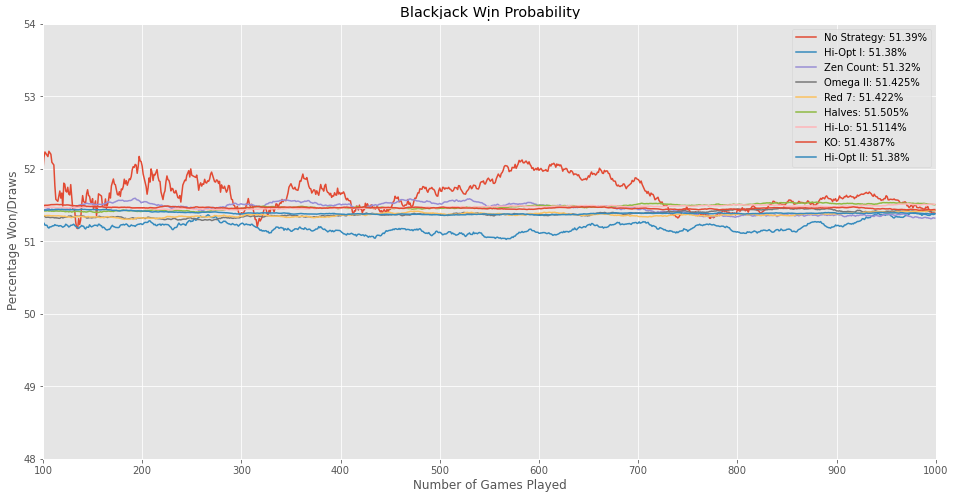

It seems that the Hi-Lo strategy is the most successful with a win rate of 51.51%, which is higher than I suspected. No strategy was 51.175%, which means that the Hi-Lo is about .3% better. I did mention in the beginning that even with a strategy we were only looking at have 0.5% edge on the Casino. I find it weird that some of the strategies perform even worse than no strategy at all. I would have guessed that all of the strategies would have beaten not using any strategy but apparently not. I did run this a few different times and the strategies effectiveness did vary slightly. Sometimes a strategy like Hi-Opt II would perform closer to 51% beating out other strategies it might not have originally. I do plan to spend more time investigating how much variation there is and simulating even more games. The problem is that the simulation is not very fast because of the way I programmed it.   

## Conclusion
I learned a ton from this project but most importantly how hard it is to code something like this. I am not a super strong programmer and usually program in R, so this was a lot. Next time I will probably go for something that doesn’t take me so many hours. The biggest thing that I learned from this project was how to count cards. I had never learned to do this or really knew all of the rules around Blackjack. I also thought that card counting was illegal but learned it wasn’t through my research, which I guess the casinos want people to think that. It was interesting to learn that even with a perfect strategy, the player doesn’t really have that big of an advantage. Even though the project is done, I still have a lot I could do with my code to make it all around better. There are also a few rules to Blackjack like doubling and splitting that I never included in my code, so it would be interesting to see how the results are affected by that. There are even more card counting strategies than the ones I tested, so one of those might be able to give a better advantage.  All in all, I learned a lot about programming and simulation from this project which will be helpful for the next project. 

## Citations
- Blackjack. (2021, March 09). Retrieved March 11, 2021, from https://en.wikipedia.org/wiki/Blackjack
- Card counting. (2021, March 02). Retrieved March 11, 2021, from https://en.wikipedia.org/wiki/Card_counting
- Santos, M. (2019, September 06). Beating the Dealer with Programming. Retrieved March 11, 2021, from https://towardsdatascience.com/beating-the-dealer-with-simple-statistics-71b5e3701638
- Shackleford, M. (2019, August 13). 4-Deck to 8-Deck Blackjack Strategy. Retrieved March 12, 2021, from https://wizardofodds.com/games/blackjack/strategy/4-decks/
- Srivats, A. (2019, May 19). Python Blackjack Simulator. Retrieved March 11, 2021, from https://towardsdatascience.com/python-blackjack-simulator-61b591ffb971
- Topor, J. (2016, December 16). Blackjack Simulation via Monte Carlo Methods. Retrieved March 11, 2021, from https://rstudio-pubs-static.s3.amazonaws.com/279263_9c56825011694da8b1916ad1d604b41b.html
